In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks
import pandas as pd

all_data={}
for j in [0,5,15]:
    data=pd.read_csv("D:Desktop/thesis/linac/film_results/2Ddose_"+str(j)+"mm.csv",delimiter= ',')
    all_data[j]=np.array(data)



0 mm pvdr:5.26813667278124 +/- 0.06698237761159077
valley dose: 1.3483430233498708
5 mm pvdr:2.472302056365655 +/- 0.03946241409361303
valley dose: 1.5031506340657608


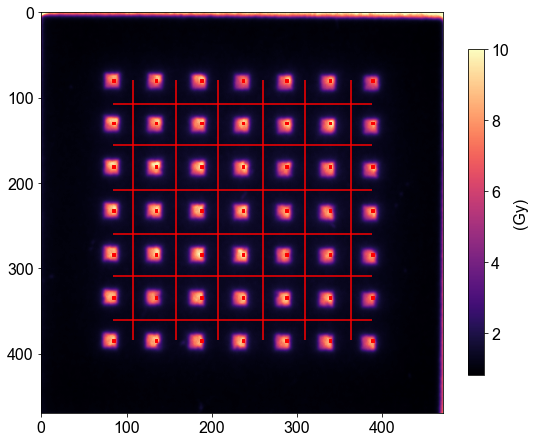

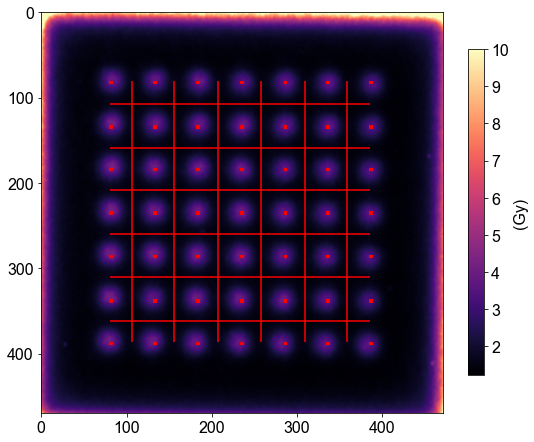

In [3]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

#peaks
mean_peaks=[]
ROI=[]
peak_error=[]
valley_error=[]
for d in [0,5]:
    col_avgs=sum(all_data[d][50:450])
    row_avgs=sum(all_data[d].T[50:450])
    peak_rows=find_peaks(row_avgs,distance=30)[0]
    peak_cols=find_peaks(col_avgs,distance=30)[0]
    peak_cols=peak_cols[int(np.where((peak_cols>=210) & ( peak_cols <=260))[0])-3:int(np.where((peak_cols>=210) & ( peak_cols <=260))[0])+4]
    peak_rows=peak_rows[int(np.where((peak_rows>=210) & ( peak_rows <=260))[0])-3:int(np.where((peak_rows>=210) & ( peak_rows <=260))[0])+4]

    peak_peaks=[[i,j] for i in peak_rows for j in peak_cols]
    
    for k,w in peak_peaks:
        ROI.append([[k,w],[k,w+1],[k+1,w],[k-1,w],[k,w-1],[k-1,w-1],[k+1,w+1],[k-1,w+1],[k+1,w-1]])
    #print(ROI,np.shape(ROI))
    peaks=[all_data[d][j][i] for i,j in np.reshape(ROI,(441,2))] 
    mean_peaks.append(np.mean(peaks))
    figure(13+d,figsize=(9,8))
    plt.imshow(all_data[d],cmap='magma',vmax=10)
    plt.colorbar(shrink=0.75,label='(Gy)')
    for i,j in np.reshape(ROI,(441,2)):
        plt.scatter(j,i,marker='s',c='red',s=1)
    STD=[]
    ROI_dose=[]
    for i in ROI:
        temp=[]
        for k in i:
            temp.append(all_data[d][k[0]][k[1]])
        ROI_dose.append(temp)
    for i in ROI_dose:
        STD.append(np.std(i))
    peak_error.append(np.sqrt(sum([i**2 for i in STD]))/49) 
    ROI=[]
mean_peaks=np.array(mean_peaks)


    
#valleys
mean_valleys=[]
for d in [0,5]:
    col_avgs=sum(all_data[d][50:450])
    row_avgs=sum(all_data[d].T[50:450])
    
    peak_rows=find_peaks(row_avgs,distance=30)[0] #need for limiting valley area search
    peak_cols=find_peaks(col_avgs,distance=30)[0]
    peak_cols=peak_cols[int(np.where((peak_cols>=210) & ( peak_cols <=260))[0])-3:int(np.where((peak_cols>=210) & ( peak_cols <=260))[0])+4]
    peak_rows=peak_rows[int(np.where((peak_rows>=210) & ( peak_rows <=260))[0])-3:int(np.where((peak_rows>=210) & ( peak_rows <=260))[0])+4]
    valley_rows=find_peaks(row_avgs[peak_rows[0]:peak_rows[-1]]*-1,distance=30)[0]+peak_rows[0]
    valley_cols=find_peaks(col_avgs[peak_cols[0]:peak_cols[-1]]*-1,distance=30)[0]+peak_cols[0]

    vert_valleys=[]
    hori_valleys=[]
    for i in valley_cols:
        vert_valleys.append(np.mean(all_data[d].T[i][peak_cols[0]:peak_cols[-1]]))
    for i in valley_rows:
        hori_valleys.append(np.mean(all_data[d][i][peak_rows[0]:peak_rows[-1]]))
        
    figure(13+d,figsize=(9,8))
    plt.hlines(valley_rows,peak_cols[0],peak_cols[-1],colors='red')
    plt.vlines(valley_cols,peak_rows[0],peak_rows[-1],colors='red')

    mean_valleys.append((np.mean(hori_valleys)+np.mean(vert_valleys))/2)
    STDS=[]
    for i in valley_cols:
        STDS.append(np.std(all_data[d].T[i][peak_cols[0]:peak_cols[-1]]))
    for j in valley_rows:
        STDS.append(np.std(all_data[d][j][peak_cols[0]:peak_cols[-1]]))
    valley_error.append(np.sqrt(sum([i**2 for i in STDS]))/12)
pvdr=mean_peaks/mean_valleys
valley_error=np.array(valley_error);peak_error=np.array(peak_error)
pvdr_error=np.sqrt((valley_error/mean_valleys)**2+(peak_error/mean_peaks)**2)*pvdr
print('0 mm pvdr:'+str(pvdr[0])+' +/- '+str(pvdr_error[0]))
print('valley dose: '+str(mean_valleys[0]))
print('5 mm pvdr:'+str(pvdr[1])+' +/- '+str(pvdr_error[1]))
print('valley dose: '+str(mean_valleys[1]))